In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the dataset
file_path = r'C:\Users\bhard\OneDrive\Desktop\My all Projects\Wine Quality Prediction\WineQT.csv'
wine_data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print(wine_data.head())

# Basic statistics of the dataset
print(wine_data.describe())

# Check for missing values
print(wine_data.isnull().sum())

# Handle missing values if any (here dropping rows with missing values)
wine_data = wine_data.dropna()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

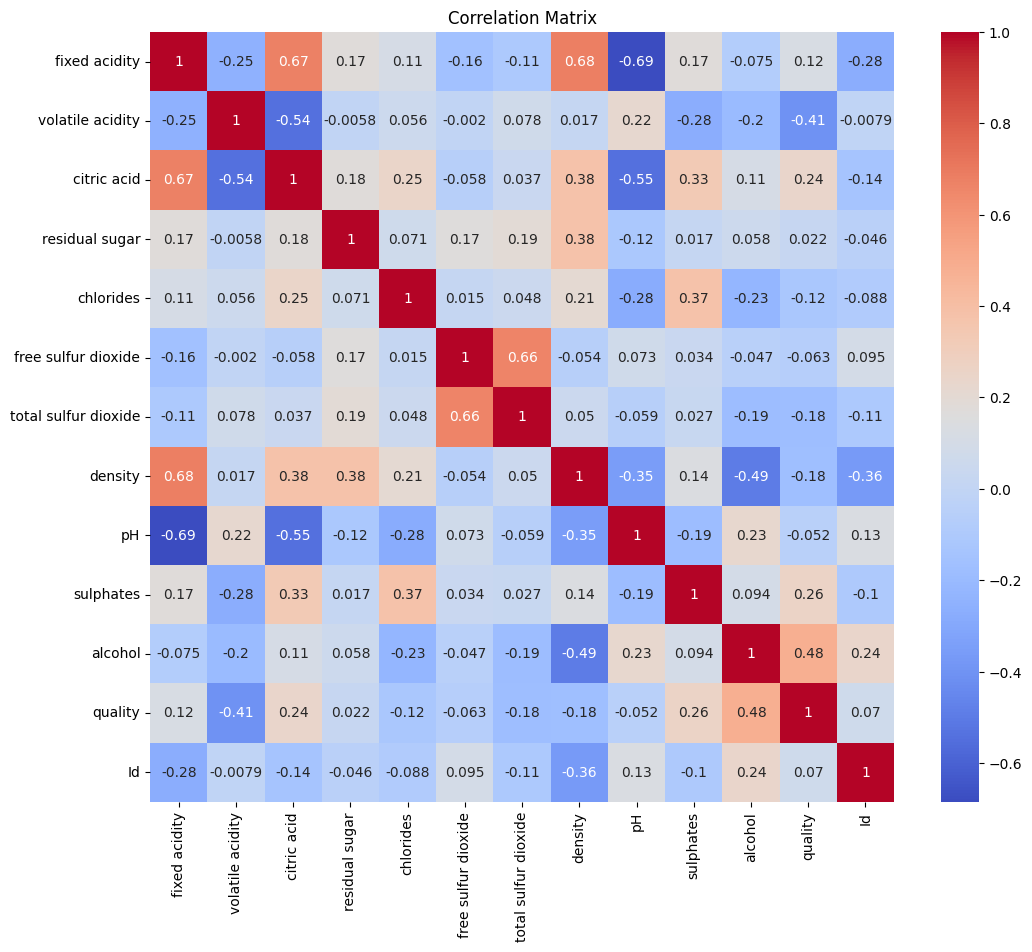

In [4]:
# Correlation matrix to understand feature relationships
plt.figure(figsize=(12, 10))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Select features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [6]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [8]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, rf_y_pred, zero_division=1))
print(confusion_matrix(y_test, rf_y_pred))

Random Forest Classifier:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         9
           5       0.68      0.73      0.70       143
           6       0.61      0.66      0.63       146
           7       0.71      0.54      0.61        41
           8       1.00      0.25      0.40         4

    accuracy                           0.65       343
   macro avg       0.80      0.43      0.47       343
weighted avg       0.66      0.65      0.64       343

[[  0   7   2   0   0]
 [  0 104  37   2   0]
 [  0  43  96   7   0]
 [  0   0  19  22   0]
 [  0   0   3   0   1]]


In [9]:
# Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
sgd_y_pred = sgd_model.predict(X_test)
print("Stochastic Gradient Descent Classifier:")
print(classification_report(y_test, sgd_y_pred, zero_division=1))
print(confusion_matrix(y_test, sgd_y_pred))

Stochastic Gradient Descent Classifier:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         9
           5       0.54      0.80      0.65       143
           6       0.63      0.40      0.49       146
           7       0.49      0.41      0.45        41
           8       0.00      0.00      0.00         4

    accuracy                           0.56       343
   macro avg       0.53      0.32      0.32       343
weighted avg       0.58      0.56      0.53       343

[[  0   7   2   0   0]
 [  0 115  24   4   0]
 [  0  75  59  12   0]
 [  0  15   8  17   1]
 [  0   1   1   2   0]]


In [10]:
# Support Vector Classifier
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)
print("Support Vector Classifier:")
print(classification_report(y_test, svc_y_pred, zero_division=1))
print(confusion_matrix(y_test, svc_y_pred))

Support Vector Classifier:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         9
           5       0.68      0.78      0.73       143
           6       0.62      0.68      0.65       146
           7       0.74      0.34      0.47        41
           8       1.00      0.00      0.00         4

    accuracy                           0.66       343
   macro avg       0.81      0.36      0.37       343
weighted avg       0.67      0.66      0.64       343

[[  0   6   3   0   0]
 [  0 112  30   1   0]
 [  0  43  99   4   0]
 [  0   4  23  14   0]
 [  0   0   4   0   0]]


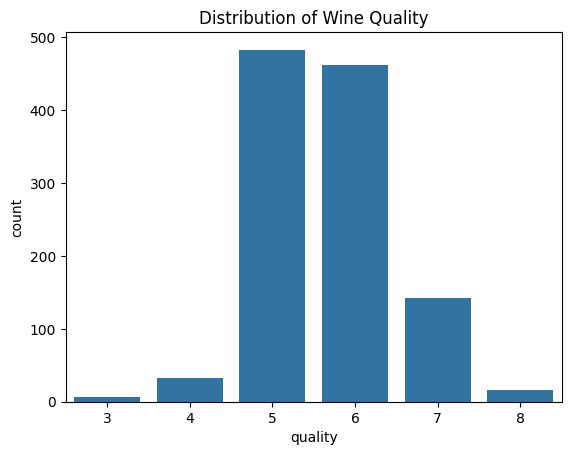

In [11]:
# Visualizing the distribution of wine quality
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.show()

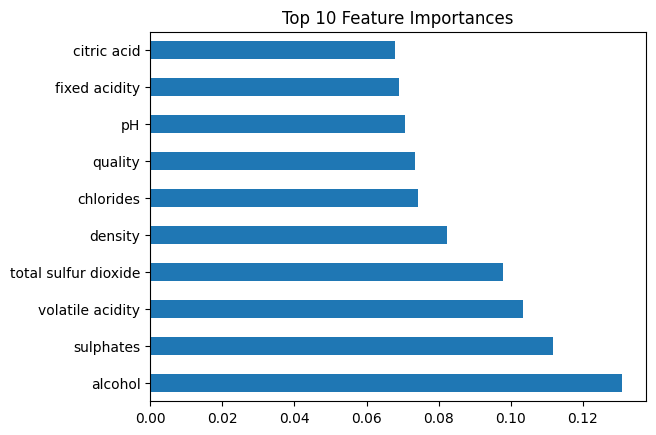

In [12]:
# Visualizing feature importance for Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=wine_data.columns[:-1])
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [13]:
# Compare performance of the three models
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'SGD Classifier', 'SVC'],
    'Accuracy': [rf_model.score(X_test, y_test), sgd_model.score(X_test, y_test), svc_model.score(X_test, y_test)]
})

print(model_comparison)

            Model  Accuracy
0   Random Forest  0.650146
1  SGD Classifier  0.556851
2             SVC  0.655977
